In [29]:
import tensorflow as tf
import numpy as np
from  tensorflow.keras import layers as ly
import keras


In [30]:
(train_im,train_l),(test_im,test_l)=tf.keras.datasets.fashion_mnist.load_data()

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_im[0,:,:])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [32]:
'''
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_im[i])  
plt.colorbar()
plt.grid()
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nplt.figure()\nplt.imshow(train_im[i])  \nplt.colorbar()\nplt.grid()\nplt.show()\n'

In [33]:
train_im=train_im/255.0
test_im=test_im/255.0


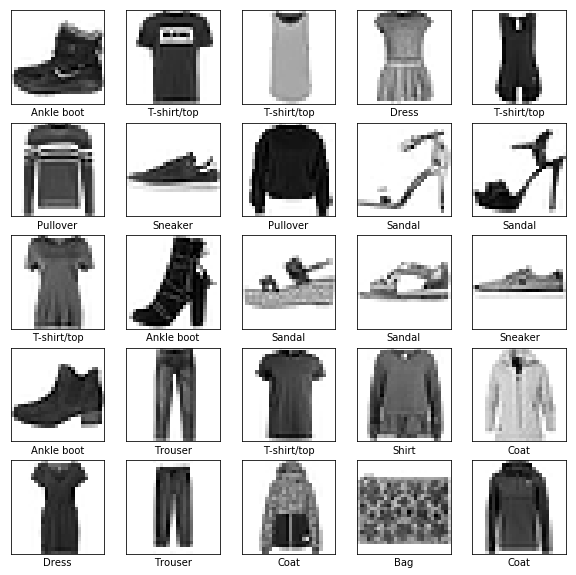

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_im[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_l[i]])
plt.show()

In [82]:
model=tf.keras.Sequential()

In [83]:
model.add(ly.Flatten(input_shape=(28,28)))
model.add(ly.Dense(128, activation=tf.nn.relu,use_bias=True))
model.add(ly.Dense(10,activation=tf.nn.softmax,use_bias=True))

In [94]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#y_train = np.zeros((train_l.shape[0], 10))
#y_train[np.arange(train_l.shape[0]), train_l] = 1

In [98]:
model.fit(train_im,train_l,epochs=20,batch_size=250,shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1947 - acc: 0.9287
Epoch 2/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1915 - acc: 0.9294
Epoch 3/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1850 - acc: 0.9329
Epoch 4/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1835 - acc: 0.9327
Epoch 5/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1766 - acc: 0.9355
Epoch 6/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1734 - acc: 0.9370
Epoch 7/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1693 - acc: 0.9386
Epoch 8/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1675 - acc: 0.9395
Epoch 9/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1652 - acc: 0.9395
Epoch 10/20
60000/60000 [==============================] - 5s 82us/sample - loss: 

In [99]:
predicts=model.predict(test_im)
print(test_im[0,:,:].shape)
test_im[0,:,:].reshape(1,28,28).shape

(28, 28)


(1, 28, 28)

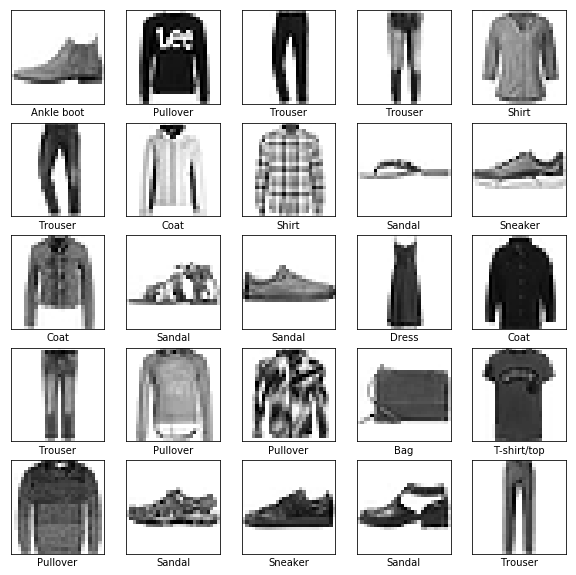

In [100]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_im[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predicts[i,:],axis=0)])
plt.show()

In [101]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.save('cloth_mnist.hd5')